In [1222]:
import pandas as pd
from rdkit import RDLogger

RDLogger.DisableLog('rdApp.info')

In [1223]:
from skmultilearn.model_selection import iterative_train_test_split

dataset = pd.read_csv('final_dataset_top.csv')

In [1224]:
X = dataset.iloc[:, 0:2]
y = dataset.iloc[:, 2:]
X, y

(            ids                                             smiles
 0        C02344                CC1(C)[C@@H]2CC[C@@](C)(C2)[C@@H]1O
 1        C02462                   CC(C)[C@]12CC[C@@](C)(O)[C@H]1C2
 2        C03190       CC1(C)C2CCC1(C)[C@@H](OP(=O)(O)OP(=O)(O)O)C2
 3        C06074                                  C=CC(=C)CCC=C(C)C
 4        C00521                            C=C(C)[C@@H]1CC=C(C)CC1
 ...         ...                                                ...
 1454  C00002242  C1(C(C(C(C(O1)(OC2(C(C(C(OC2(C(O[H])([H])[H])[...
 1455  C00030216  C1(C(C(C2(C(C1([H])[H])(C3(C(C(C2([H])[H])([H]...
 1456  C00002264  O(C1(C(C=2C(C(C1([H])[H])([H])[H])(C3(C(C(C2[H...
 1457  C00002265  C1(C(C(C(C(O1)(OC2(C(C(C(OC2(OC3(C(C=4C(C(C3([...
 1458  C00002260  C1(C(C(C(C(O1)(OC2(C(C(C(OC2(OC3(C(C=4C(C(C3([...
 
 [1459 rows x 2 columns],
       C00341  C01789  C00078  C00049  C00183  C03506  C00187  C00079  C00047   
 0        1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0

In [1225]:
from skmultilearn.model_selection import IterativeStratification

stratifier = IterativeStratification(n_splits=2, order=2, sample_distribution_per_fold=[0.3, 0.7])
train_indexes, test_indexes = next(stratifier.split(X, y))

In [1226]:
dataset.iloc[train_indexes, :].to_csv('train.csv', index=False)

In [1227]:
dataset.iloc[test_indexes, :].to_csv('test.csv', index=False)

In [1228]:
train_dataset = dataset.iloc[train_indexes, :]
train_dataset_X = train_dataset.iloc[:, 0:2]
train_dataset_y = train_dataset.iloc[:, 2:]
stratifier = IterativeStratification(n_splits=2, order=2, sample_distribution_per_fold=[0.3, 0.7])
train_indexes, validation_indexes = next(stratifier.split(train_dataset_X, train_dataset_y))

In [1229]:
train_dataset.iloc[train_indexes, :].to_csv('train.csv', index=False)

In [1230]:
train_dataset.iloc[validation_indexes, :].to_csv('validation.csv', index=False)

In [1231]:
from deepmol.loaders import CSVLoader

loader = CSVLoader(dataset_path='train.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   labels_fields=['C00341','C01789','C00078','C00049','C00183','C03506','C00187','C00079','C00047','C01852','C00407','C00129','C00235','C00062','C00353','C00148','C00073','C00108','C00123','C00135','C00448','C00082','C00041'],
                   mode='auto')
# create the dataset
train_dataset = loader.create_dataset(sep=',', header=0)

2023-06-17 15:57:08,894 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [1232]:
train_dataset.get_shape()

2023-06-17 15:57:09,027 — INFO — Mols_shape: (714,)
2023-06-17 15:57:09,029 — INFO — Features_shape: None
2023-06-17 15:57:09,030 — INFO — Labels_shape: (714, 23)


((714,), None, (714, 23))

In [1233]:
loader = CSVLoader(dataset_path='validation.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   labels_fields=['C00341','C01789','C00078','C00049','C00183','C03506','C00187','C00079','C00047','C01852','C00407','C00129','C00235','C00062','C00353','C00148','C00073','C00108','C00123','C00135','C00448','C00082','C00041'],
                   mode='auto')
# create the dataset
validation_dataset = loader.create_dataset(sep=',', header=0)

2023-06-17 15:57:09,418 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [1234]:
loader = CSVLoader(dataset_path='test.csv',
                   smiles_field='smiles',
                   id_field='ids',
                   labels_fields=['C00341','C01789','C00078','C00049','C00183','C03506','C00187','C00079','C00047','C01852','C00407','C00129','C00235','C00062','C00353','C00148','C00073','C00108','C00123','C00135','C00448','C00082','C00041'],
                   mode='auto')
# create the dataset
test_dataset = loader.create_dataset(sep=',', header=0)

2023-06-17 15:57:09,609 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [1235]:
train_dataset.get_shape()
test_dataset.get_shape()
validation_dataset.get_shape()

2023-06-17 15:57:09,829 — INFO — Mols_shape: (714,)
2023-06-17 15:57:09,830 — INFO — Features_shape: None
2023-06-17 15:57:09,831 — INFO — Labels_shape: (714, 23)
2023-06-17 15:57:09,832 — INFO — Mols_shape: (436,)
2023-06-17 15:57:09,834 — INFO — Features_shape: None
2023-06-17 15:57:09,835 — INFO — Labels_shape: (436, 23)
2023-06-17 15:57:09,836 — INFO — Mols_shape: (309,)
2023-06-17 15:57:09,838 — INFO — Features_shape: None
2023-06-17 15:57:09,839 — INFO — Labels_shape: (309, 23)


((309,), None, (309, 23))

In [1236]:
import numpy as np

num_ones_per_column = np.sum(train_dataset.y == 1, axis=0)

print(num_ones_per_column)

[ 29  14 128  13   1  17   8 198  25  40   1  13  15  22 133  35  31  30
  31   9  48 125  12]


In [1237]:
num_ones_per_column = np.sum(test_dataset.y == 1, axis=0)

print(num_ones_per_column)

[ 18   8  79   8   1  10   5 121  15  25   1   8   9  12  81  22  20  19
  20   6  30  77   7]


In [1238]:
num_ones_per_column = np.sum(validation_dataset.y == 1, axis=0)

print(num_ones_per_column)

[13  6 55  6  0  7  4 85 11 18  0  5  7  8 57 15 14 13 14  4 21 54  5]


In [1239]:
from deepmol.pipeline import Pipeline
from deepmol.feature_selection import LowVarianceFS
from deepmol.compound_featurization import MorganFingerprint
from deepmol.standardizer import ChEMBLStandardizer
import numpy as np
import random


steps = [('basic standardizing', ChEMBLStandardizer()),
         ('morgan fingerprints', MorganFingerprint(radius=2, size=1024)),
         ('low variance feature selection', LowVarianceFS(threshold=0.07)),
         ]
pipeline = Pipeline(steps=steps, path="percursors_1")

2023-06-17 15:57:10,739 — INFO — Standardizer ChEMBLStandardizer initialized with -1 jobs.


In [1240]:
train_dataset = pipeline.fit_transform(train_dataset)

[15:57:15] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****



2023-06-17 15:57:15,548 — ERROR — Failed to featurize C.CC=C1CN2C3CC1C(C=O)C2Cc1c3[nH]c2ccccc12. Appending empty array
2023-06-17 15:57:15,567 — ERROR — Exception message: Pre-condition Violation
	RingInfo not initialized
	Violation occurred on line 52 in file Code/GraphMol/RingInfo.cpp
	Failed Expression: df_init
	RDKIT: 2022.09.3
	BOOST: 1_78

2023-06-17 15:57:15,710 — ERROR — Molecule with smiles: C.CC=C1CN2C3CC1C(C=O)C2Cc1c3[nH]c2ccccc12 removed from dataset.


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/deepmol/compound_featurization/base_featurizer.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)
[15:57:20] 

****
Pre-condition Violation
RingInfo not initialized
Violation occurred on line 52 in file /project/build/temp.linux-x86_64-cpython-39/rdkit/Code/GraphMol/RingInfo.cpp
Failed Expression: df_init
****



2023-06-17 15:57:20,227 — ERROR — Failed to featurize C.CC=C1CN2C3CC1C(C=O)C2Cc1c3[nH]c2ccccc12. Appending empty array
2023-06-17 15:57:20,230 — ERROR — Exception message: Pre-condition Violation
	RingInfo not initialized
	Violation occurred on line 52 in file Code/GraphMol/RingInfo.cpp
	Failed Expression: df_init
	RDKIT: 2022.09.3
	BOOST: 1_78

2023-06-17 15:57:20,579 — ERROR — Molecule with smiles: C.CC=C1CN2C3CC1C(C=O)C2Cc1c3[nH]c2ccccc12 removed from dataset.


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/deepmol/compound_featurization/base_featurizer.py:103: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features = np.array(features)


In [1241]:
validation_dataset = pipeline.transform(validation_dataset)

In [1242]:
test_dataset = pipeline.transform(test_dataset)

In [1243]:
train_dataset.get_shape()

2023-06-17 15:57:26,412 — INFO — Mols_shape: (713,)
2023-06-17 15:57:26,414 — INFO — Features_shape: (713, 128)
2023-06-17 15:57:26,416 — INFO — Labels_shape: (713, 23)


((713,), (713, 128), (713, 23))

In [1244]:
from sklearn.tree import DecisionTreeClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {"criterion": ["gini", "entropy"], "splitter": ['best', 'random']}
optimizer = HyperparameterOptimizerValidation(DecisionTreeClassifier)
best_dtree, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:57:26,562 — INFO — Fitting 4 random models from a space of 4 possible models.
2023-06-17 15:57:26,563 — INFO — Fitting model 1/4
2023-06-17 15:57:26,564 — INFO — hyperparameters: {'criterion': 'gini', 'splitter': 'best'}
2023-06-17 15:57:26,592 — INFO — Model 1/4, Metric f1_score_macro, Validation set 1: 0.585958
2023-06-17 15:57:26,593 — INFO — 	best_validation_score so far: 0.585958
2023-06-17 15:57:26,594 — INFO — Fitting model 2/4
2023-06-17 15:57:26,596 — INFO — hyperparameters: {'criterion': 'gini', 'splitter': 'random'}
2023-06-17 15:57:26,624 — INFO — Model 2/4, Metric f1_score_macro, Validation set 2: 0.576670
2023-06-17 15:57:26,624 — INFO — 	best_validation_score so far: 0.585958
2023-06-17 15:57:26,625 — INFO — Fitting model 3/4
2023-06-17 15:57:26,628 — INFO — hyperparameters: {'criterion': 'entropy', 'splitter': 'best'}
2023-06-17 15:57:26,655 — INFO — Model 3/4, Metric f1_score_macro, Validation set 3: 0.621552
2023-06-17 15:57:26,656 — INFO — 	best_validat

/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior

In [1245]:
predictions = best_dtree.predict(test_dataset)
predictions = np.array(predictions)

In [1246]:
processed_predictions = np.zeros((test_dataset.y.shape[0], test_dataset.y.shape[1]))
for i, prediction in enumerate(predictions):
    result = np.where(prediction[:, 1] == 1, 1, 0)
    processed_predictions[:, i] = result

In [1296]:
f1_score_macro(test_dataset.y, processed_predictions)

0.6869832897686894

In [1248]:

from sklearn.metrics import precision_score,recall_score, accuracy_score

precision = precision_score(test_dataset.y, processed_predictions, average='macro')
recall = recall_score(test_dataset.y, processed_predictions, average='macro')
accuracy = accuracy_score(test_dataset.y, processed_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.6798147635735615
Recall: 0.7066799602770923
Accuracy: 0.7110091743119266


In [1249]:
selected_features = pipeline.steps[2][1].features_to_keep
num_selected_features = len(selected_features)
print("Number of features:", num_selected_features)


Number of features: 128


In [1250]:
from sklearn.tree import ExtraTreeClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {"criterion": ["gini", "entropy"], "splitter": ['best', 'random']}
optimizer = HyperparameterOptimizerValidation(ExtraTreeClassifier)
best_extratree, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:57:28,259 — INFO — Fitting 4 random models from a space of 4 possible models.
2023-06-17 15:57:28,260 — INFO — Fitting model 1/4
2023-06-17 15:57:28,261 — INFO — hyperparameters: {'criterion': 'gini', 'splitter': 'best'}
2023-06-17 15:57:28,276 — INFO — Model 1/4, Metric f1_score_macro, Validation set 1: 0.597199
2023-06-17 15:57:28,277 — INFO — 	best_validation_score so far: 0.597199
2023-06-17 15:57:28,279 — INFO — Fitting model 2/4
2023-06-17 15:57:28,281 — INFO — hyperparameters: {'criterion': 'gini', 'splitter': 'random'}
2023-06-17 15:57:28,296 — INFO — Model 2/4, Metric f1_score_macro, Validation set 2: 0.590828
2023-06-17 15:57:28,296 — INFO — 	best_validation_score so far: 0.597199
2023-06-17 15:57:28,298 — INFO — Fitting model 3/4
2023-06-17 15:57:28,299 — INFO — hyperparameters: {'criterion': 'entropy', 'splitter': 'best'}
2023-06-17 15:57:28,314 — INFO — Model 3/4, Metric f1_score_macro, Validation set 3: 0.585396
2023-06-17 15:57:28,315 — INFO — 	best_validat

/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior

In [1304]:
predictions = best_extratree.predict(test_dataset)
processed_predictions = np.zeros((test_dataset.y.shape[0], test_dataset.y.shape[1]))
for i, prediction in enumerate(predictions):
    result = np.where(prediction[:, 1] == 1, 1, 0)
    processed_predictions[:, i] = result

extra_tree_precision = precision_score(test_dataset.y, processed_predictions, average='macro')
extra_tree_recall = recall_score(test_dataset.y, processed_predictions, average='macro')
extra_tree_accuracy = accuracy_score(test_dataset.y,processed_predictions)

print (f1_score_macro(test_dataset.y, processed_predictions))

print(" Precision:", extra_tree_precision)
print(" Recall:", extra_tree_recall)
print(" Accuracy:", extra_tree_accuracy)


0.5578000846324279
 Precision: 0.6040487758678548
 Recall: 0.5610809847637558
 Accuracy: 0.6651376146788991


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1252]:
from sklearn.ensemble import ExtraTreesClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {"criterion": ["gini", "entropy","log_loss"]}
optimizer = HyperparameterOptimizerValidation(ExtraTreesClassifier)
best_etree, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:57:28,926 — INFO — Fitting 3 random models from a space of 3 possible models.
2023-06-17 15:57:28,928 — INFO — Fitting model 1/3
2023-06-17 15:57:28,929 — INFO — hyperparameters: {'criterion': 'gini'}
2023-06-17 15:57:29,634 — INFO — Model 1/3, Metric f1_score_macro, Validation set 1: 0.644884
2023-06-17 15:57:29,634 — INFO — 	best_validation_score so far: 0.644884
2023-06-17 15:57:29,635 — INFO — Fitting model 2/3
2023-06-17 15:57:29,637 — INFO — hyperparameters: {'criterion': 'entropy'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:30,354 — INFO — Model 2/3, Metric f1_score_macro, Validation set 2: 0.641255
2023-06-17 15:57:30,355 — INFO — 	best_validation_score so far: 0.644884
2023-06-17 15:57:30,356 — INFO — Fitting model 3/3
2023-06-17 15:57:30,358 — INFO — hyperparameters: {'criterion': 'log_loss'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:31,352 — INFO — Model 3/3, Metric f1_score_macro, Validation set 3: 0.668323
2023-06-17 15:57:31,353 — INFO — 	best_validation_score so far: 0.668323
2023-06-17 15:57:31,540 — INFO — Best hyperparameters: {'criterion': 'log_loss'}
2023-06-17 15:57:31,541 — INFO — train_score: 0.997734
2023-06-17 15:57:31,543 — INFO — validation_score: 0.668323


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [1299]:
extra_tree_predictions = best_etree.predict(test_dataset)
extra_t_processed_predictions = np.zeros((test_dataset.y.shape[0], test_dataset.y.shape[1]))
for i, prediction in enumerate(extra_tree_predictions):
    result = np.where(prediction[:, 1] == 1, 1, 0)
    extra_t_processed_predictions[:, i] = result

print (f1_score_macro(test_dataset.y, extra_t_processed_predictions))
extra_tree_precision = precision_score(test_dataset.y, extra_t_processed_predictions, average='macro')
extra_tree_recall = recall_score(test_dataset.y, extra_t_processed_predictions, average='macro')
extra_tree_accuracy = accuracy_score(test_dataset.y, extra_t_processed_predictions)

print(" Precision:", extra_tree_precision)
print(" Recall:", extra_tree_recall)
print(" Accuracy:", extra_tree_accuracy)

0.15958109350966493
 Precision: 0.5971014492753624
 Recall: 0.09538950080427479
 Accuracy: 0.14908256880733944


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1254]:
from sklearn.neighbors import KNeighborsClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {'weights':['uniform', 'distance'],"algorithm" :["auto", "ball_tree", "kd_tree", "brute"]}
optimizer = HyperparameterOptimizerValidation(KNeighborsClassifier)
best_kneighbors, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:57:31,740 — INFO — Fitting 8 random models from a space of 8 possible models.
2023-06-17 15:57:31,742 — INFO — Fitting model 1/8
2023-06-17 15:57:31,745 — INFO — hyperparameters: {'weights': 'uniform', 'algorithm': 'auto'}
2023-06-17 15:57:31,834 — INFO — Model 1/8, Metric f1_score_macro, Validation set 1: 0.650276
2023-06-17 15:57:31,838 — INFO — 	best_validation_score so far: 0.650276
2023-06-17 15:57:31,841 — INFO — Fitting model 2/8
2023-06-17 15:57:31,845 — INFO — hyperparameters: {'weights': 'uniform', 'algorithm': 'ball_tree'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:31,932 — INFO — Model 2/8, Metric f1_score_macro, Validation set 2: 0.650602
2023-06-17 15:57:31,935 — INFO — 	best_validation_score so far: 0.650602
2023-06-17 15:57:31,937 — INFO — Fitting model 3/8
2023-06-17 15:57:31,938 — INFO — hyperparameters: {'weights': 'uniform', 'algorithm': 'kd_tree'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:32,039 — INFO — Model 3/8, Metric f1_score_macro, Validation set 3: 0.622619
2023-06-17 15:57:32,041 — INFO — 	best_validation_score so far: 0.650602
2023-06-17 15:57:32,042 — INFO — Fitting model 4/8
2023-06-17 15:57:32,044 — INFO — hyperparameters: {'weights': 'uniform', 'algorithm': 'brute'}
2023-06-17 15:57:32,091 — INFO — Model 4/8, Metric f1_score_macro, Validation set 4: 0.650276
2023-06-17 15:57:32,092 — INFO — 	best_validation_score so far: 0.650602
2023-06-17 15:57:32,093 — INFO — Fitting model 5/8
2023-06-17 15:57:32,095 — INFO — hyperparameters: {'weights': 'distance', 'algorithm': 'auto'}
2023-06-17 15:57:32,121 — INFO — Model 5/8, Metric f1_score_macro, Validation set 5: 0.683566
2023-06-17 15:57:32,122 — INFO — 	best_validation_score so far: 0.683566
2023-06-17 15:57:32,123 — INFO — Fitting model 6/8
2023-06-17 15:57:32,124 — INFO — hyperparameters: {'weights': 'distance', 'algorithm': 'ball_tree'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior

2023-06-17 15:57:32,187 — INFO — Model 6/8, Metric f1_score_macro, Validation set 6: 0.690575
2023-06-17 15:57:32,188 — INFO — 	best_validation_score so far: 0.690575
2023-06-17 15:57:32,189 — INFO — Fitting model 7/8
2023-06-17 15:57:32,191 — INFO — hyperparameters: {'weights': 'distance', 'algorithm': 'kd_tree'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:32,271 — INFO — Model 7/8, Metric f1_score_macro, Validation set 7: 0.660926
2023-06-17 15:57:32,272 — INFO — 	best_validation_score so far: 0.690575
2023-06-17 15:57:32,274 — INFO — Fitting model 8/8
2023-06-17 15:57:32,276 — INFO — hyperparameters: {'weights': 'distance', 'algorithm': 'brute'}
2023-06-17 15:57:32,305 — INFO — Model 8/8, Metric f1_score_macro, Validation set 8: 0.683566
2023-06-17 15:57:32,306 — INFO — 	best_validation_score so far: 0.690575


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:32,413 — INFO — Best hyperparameters: {'weights': 'distance', 'algorithm': 'ball_tree'}
2023-06-17 15:57:32,415 — INFO — train_score: 0.997734
2023-06-17 15:57:32,417 — INFO — validation_score: 0.690575


In [1305]:
predictions = best_kneighbors.predict(test_dataset)
processed_prediction = np.zeros((test_dataset.y.shape[0], test_dataset.y.shape[1]))
for i, prediction in enumerate(extra_tree_predictions):
    result = np.where(prediction[:, 1] == 1, 1, 0)
    processed_prediction[:, i] = result
print (f1_score_macro(test_dataset.y, processed_prediction))
precision = precision_score(test_dataset.y, processed_prediction, average='macro')
recall = recall_score(test_dataset.y, processed_prediction, average='macro')
accuracy = accuracy_score(test_dataset.y, processed_prediction)

print(" Precision:", precision)
print(" Recall:", recall)
print(" Accuracy:", accuracy)

0.44723731147637935
 Precision: 0.7881957571938669
 Recall: 0.34802061422665254
 Accuracy: 0.48853211009174313


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1256]:
from sklearn.neural_network import MLPClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {'activation':['identity', 'logistic','tanh','relu'],"solver" :["lbfgs", "sgd", "adam"]}
optimizer = HyperparameterOptimizerValidation(MLPClassifier)
best_MLP, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:57:32,734 — INFO — Fitting 12 random models from a space of 12 possible models.
2023-06-17 15:57:32,735 — INFO — Fitting model 1/12
2023-06-17 15:57:32,737 — INFO — hyperparameters: {'activation': 'identity', 'solver': 'lbfgs'}
2023-06-17 15:57:35,656 — INFO — Model 1/12, Metric f1_score_macro, Validation set 1: 0.675212
2023-06-17 15:57:35,664 — INFO — 	best_validation_score so far: 0.675212
2023-06-17 15:57:35,669 — INFO — Fitting model 2/12
2023-06-17 15:57:35,674 — INFO — hyperparameters: {'activation': 'identity', 'solver': 'sgd'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:39,160 — INFO — Model 2/12, Metric f1_score_macro, Validation set 2: 0.229842
2023-06-17 15:57:39,168 — INFO — 	best_validation_score so far: 0.675212
2023-06-17 15:57:39,170 — INFO — Fitting model 3/12
2023-06-17 15:57:39,171 — INFO — hyperparameters: {'activation': 'identity', 'solver': 'adam'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:42,342 — INFO — Model 3/12, Metric f1_score_macro, Validation set 3: 0.665789
2023-06-17 15:57:42,351 — INFO — 	best_validation_score so far: 0.675212
2023-06-17 15:57:42,354 — INFO — Fitting model 4/12
2023-06-17 15:57:42,356 — INFO — hyperparameters: {'activation': 'logistic', 'solver': 'lbfgs'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:45,327 — INFO — Model 4/12, Metric f1_score_macro, Validation set 4: 0.709025
2023-06-17 15:57:45,334 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:57:45,336 — INFO — Fitting model 5/12
2023-06-17 15:57:45,338 — INFO — hyperparameters: {'activation': 'logistic', 'solver': 'sgd'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:49,188 — INFO — Model 5/12, Metric f1_score_macro, Validation set 5: 0.000000
2023-06-17 15:57:49,192 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:57:49,196 — INFO — Fitting model 6/12
2023-06-17 15:57:49,199 — INFO — hyperparameters: {'activation': 'logistic', 'solver': 'adam'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:52,690 — INFO — Model 6/12, Metric f1_score_macro, Validation set 6: 0.250016
2023-06-17 15:57:52,698 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:57:52,699 — INFO — Fitting model 7/12
2023-06-17 15:57:52,701 — INFO — hyperparameters: {'activation': 'tanh', 'solver': 'lbfgs'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:57:55,447 — INFO — Model 7/12, Metric f1_score_macro, Validation set 7: 0.703843
2023-06-17 15:57:55,449 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:57:55,450 — INFO — Fitting model 8/12
2023-06-17 15:57:55,452 — INFO — hyperparameters: {'activation': 'tanh', 'solver': 'sgd'}
2023-06-17 15:57:58,857 — INFO — Model 8/12, Metric f1_score_macro, Validation set 8: 0.180454
2023-06-17 15:57:58,861 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:57:58,862 — INFO — Fitting model 9/12
2023-06-17 15:57:58,864 — INFO — hyperparameters: {'activation': 'tanh', 'solver': 'adam'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:58:02,607 — INFO — Model 9/12, Metric f1_score_macro, Validation set 9: 0.655295
2023-06-17 15:58:02,608 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:58:02,612 — INFO — Fitting model 10/12
2023-06-17 15:58:02,619 — INFO — hyperparameters: {'activation': 'relu', 'solver': 'lbfgs'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:58:06,159 — INFO — Model 10/12, Metric f1_score_macro, Validation set 10: 0.671162
2023-06-17 15:58:06,164 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:58:06,168 — INFO — Fitting model 11/12
2023-06-17 15:58:06,172 — INFO — hyperparameters: {'activation': 'relu', 'solver': 'sgd'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:58:08,430 — INFO — Model 11/12, Metric f1_score_macro, Validation set 11: 0.149362
2023-06-17 15:58:08,431 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:58:08,436 — INFO — Fitting model 12/12
2023-06-17 15:58:08,438 — INFO — hyperparameters: {'activation': 'relu', 'solver': 'adam'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:58:10,619 — INFO — Model 12/12, Metric f1_score_macro, Validation set 12: 0.669863
2023-06-17 15:58:10,620 — INFO — 	best_validation_score so far: 0.709025
2023-06-17 15:58:10,641 — INFO — Best hyperparameters: {'activation': 'logistic', 'solver': 'lbfgs'}
2023-06-17 15:58:10,643 — INFO — train_score: 0.997754
2023-06-17 15:58:10,644 — INFO — validation_score: 0.709025


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [1295]:
from sklearn.metrics import classification_report

mlp_predictions = best_MLP.predict(test_dataset)
mlp_processed_predictions = np.argmax(mlp_predictions, axis=1)

# Convert test_dataset.y to single-column format
y_true = np.argmax(test_dataset.y, axis=1)

report = classification_report(y_true, mlp_processed_predictions)
print(report)




              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.89      1.00      0.94         8
           2       0.87      0.61      0.72        79
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         1
           5       0.83      0.50      0.62        10
           6       1.00      0.80      0.89         5
           7       0.83      0.92      0.87       100
           8       0.75      0.60      0.67        15
           9       0.17      0.25      0.20         8
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.88      0.78      0.82         9
          13       0.00      0.00      0.00         8
          14       0.79      0.86      0.82        73
          15       0.00      0.00      0.00         1
          17       0.45      0.56      0.50         9
          18       0.00    

/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

In [1297]:
from sklearn.ensemble import RandomForestClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {"criterion": ["gini", "entropy","log_loss"]}
optimizer = HyperparameterOptimizerValidation(RandomForestClassifier)
best_forest, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 18:34:59,288 — INFO — Fitting 3 random models from a space of 3 possible models.
2023-06-17 18:34:59,293 — INFO — Fitting model 1/3
2023-06-17 18:34:59,296 — INFO — hyperparameters: {'criterion': 'gini'}
2023-06-17 18:34:59,913 — INFO — Model 1/3, Metric f1_score_macro, Validation set 1: 0.626678
2023-06-17 18:34:59,914 — INFO — 	best_validation_score so far: 0.626678
2023-06-17 18:34:59,914 — INFO — Fitting model 2/3
2023-06-17 18:34:59,915 — INFO — hyperparameters: {'criterion': 'entropy'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 18:35:00,620 — INFO — Model 2/3, Metric f1_score_macro, Validation set 2: 0.622457
2023-06-17 18:35:00,621 — INFO — 	best_validation_score so far: 0.626678
2023-06-17 18:35:00,622 — INFO — Fitting model 3/3
2023-06-17 18:35:00,623 — INFO — hyperparameters: {'criterion': 'log_loss'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 18:35:01,412 — INFO — Model 3/3, Metric f1_score_macro, Validation set 3: 0.624236
2023-06-17 18:35:01,413 — INFO — 	best_validation_score so far: 0.626678


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 18:35:01,616 — INFO — Best hyperparameters: {'criterion': 'gini'}
2023-06-17 18:35:01,617 — INFO — train_score: 0.997756
2023-06-17 18:35:01,618 — INFO — validation_score: 0.626678


In [1298]:
extra_tree_predictions = best_forest.predict(test_dataset)
extra_tree_processed_prediction = np.zeros((test_dataset.y.shape[0], test_dataset.y.shape[1]))
for i, prediction in enumerate(extra_tree_predictions):
    result = np.where(prediction[:, 1] == 1, 1, 0)
    extra_tree_processed_prediction[:, i] = result
print (f1_score_macro(test_dataset.y, extra_tree_processed_prediction))
extra_tree_precision = precision_score(test_dataset.y, extra_tree_processed_prediction, average='macro')
extra_tree_recall = recall_score(test_dataset.y, extra_tree_processed_prediction, average='macro')
extra_tree_accuracy = accuracy_score(test_dataset.y, extra_tree_processed_prediction)

print("Precision:", extra_tree_precision)
print(" Recall:", extra_tree_recall)
print("Accuracy:", extra_tree_accuracy)

0.014373920803988903
ExtraTreeClassifier Precision: 0.13043478260869565
ExtraTreeClassifier Recall: 0.007798038101068405
ExtraTreeClassifier Accuracy: 0.04357798165137615


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1263]:
from sklearn.linear_model import RidgeClassifier
from deepmol.metrics import Metric
from sklearn.metrics import f1_score
from deepmol.parameter_optimization import HyperparameterOptimizerValidation


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

params_dict_svc = {"solver": ["auto", "svd","cholesky","lsqr","sparse_cg","sag","saga"]}
optimizer = HyperparameterOptimizerValidation(RidgeClassifier)
best_fo, best_hyperparams, all_results = optimizer.hyperparameter_search(train_dataset=train_dataset,
                                                                          valid_dataset=validation_dataset,
                                                                          metric=Metric(f1_score_macro),
                                                                          maximize_metric=True,
                                                                          n_iter_search=100,
                                                                          params_dict=params_dict_svc,
                                                                          model_type="sklearn"
                                                                          )

2023-06-17 15:59:32,314 — INFO — Fitting 7 random models from a space of 7 possible models.
2023-06-17 15:59:32,317 — INFO — Fitting model 1/7
2023-06-17 15:59:32,319 — INFO — hyperparameters: {'solver': 'auto'}
2023-06-17 15:59:32,344 — INFO — Model 1/7, Metric f1_score_macro, Validation set 1: 0.586887
2023-06-17 15:59:32,345 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:32,346 — INFO — Fitting model 2/7
2023-06-17 15:59:32,347 — INFO — hyperparameters: {'solver': 'svd'}
2023-06-17 15:59:32,385 — INFO — Model 2/7, Metric f1_score_macro, Validation set 2: 0.586887
2023-06-17 15:59:32,386 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:32,388 — INFO — Fitting model 3/7
2023-06-17 15:59:32,389 — INFO — hyperparameters: {'solver': 'cholesky'}
2023-06-17 15:59:32,417 — INFO — Model 3/7, Metric f1_score_macro, Validation set 3: 0.586887
2023-06-17 15:59:32,418 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:32,420 — INFO — Fitting mod

/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior

2023-06-17 15:59:33,027 — INFO — Model 4/7, Metric f1_score_macro, Validation set 4: 0.586887
2023-06-17 15:59:33,028 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:33,030 — INFO — Fitting model 5/7
2023-06-17 15:59:33,031 — INFO — hyperparameters: {'solver': 'sparse_cg'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:59:34,109 — INFO — Model 5/7, Metric f1_score_macro, Validation set 5: 0.586887
2023-06-17 15:59:34,114 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:34,116 — INFO — Fitting model 6/7
2023-06-17 15:59:34,120 — INFO — hyperparameters: {'solver': 'sag'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:59:35,747 — INFO — Model 6/7, Metric f1_score_macro, Validation set 6: 0.586887
2023-06-17 15:59:35,748 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:35,749 — INFO — Fitting model 7/7
2023-06-17 15:59:35,751 — INFO — hyperparameters: {'solver': 'saga'}


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


2023-06-17 15:59:40,185 — INFO — Model 7/7, Metric f1_score_macro, Validation set 7: 0.586887
2023-06-17 15:59:40,187 — INFO — 	best_validation_score so far: 0.586887
2023-06-17 15:59:40,201 — INFO — Best hyperparameters: {'solver': 'saga'}
2023-06-17 15:59:40,203 — INFO — train_score: 0.718392
2023-06-17 15:59:40,204 — INFO — validation_score: 0.586887


/home/joao/anaconda3/envs/SMpercursorPredictor/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


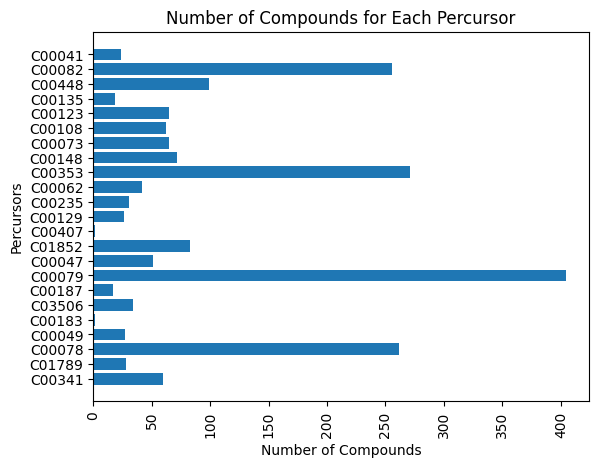

In [1260]:
import pandas as pd
import matplotlib.pyplot as plt

dataset
# Create a DataFrame from the dataset
df = pd.DataFrame(dataset)

# Exclude 'ids' and 'smiles' columns from sum calculation
sum_ones = df.iloc[:, 2:].sum()

#modified_labels = sum_ones.index.tolist()
#modified_labels[0] = 'New Label'    
# Create the plot
plt.barh(sum_ones.index, sum_ones.values)

# Add labels and title
plt.xlabel('Number of Compounds')
plt.ylabel('Percursors')
plt.title('Number of Compounds for Each Percursor')

plt.xticks(rotation=90)
# Display the plot
plt.show()


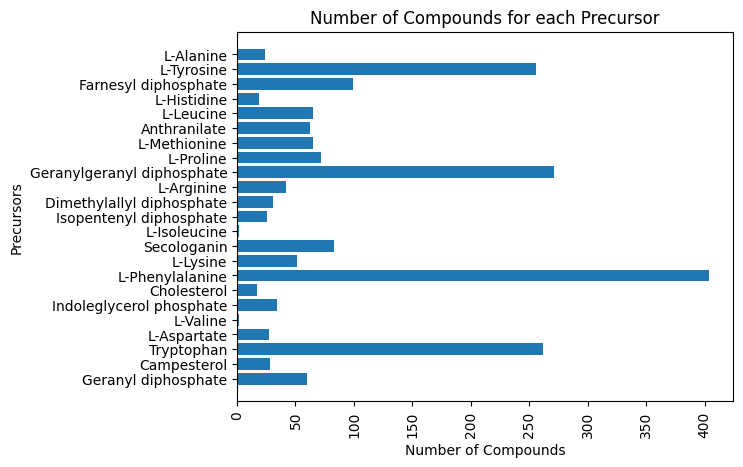

In [1261]:

import pandas as pd
import matplotlib.pyplot as plt

dataset
# Create a DataFrame from the dataset
df = pd.DataFrame(dataset)

# Exclude 'ids' and 'smiles' columns from sum calculation
sum_ones = df.iloc[:, 2:].sum()


modified_labels2 = ['Geranyl diphosphate','Campesterol','Tryptophan','L-Aspartate','L-Valine'
                   'Indoleglycerol phosphate','Cholesterol','L-Phenylalanine','L-Lysine','Secologanin'
                   'L-Isoleucine','Isopentenyl diphosphate','Dimethylallyl diphosphate','L-Arginine'
                   'Geranylgeranyl diphosphate','L-Proline','L-Methionine','Anthranilate','L-Leucine'
                   'L-Histidine','Farnesyl diphosphate','L-Tyrosine','L-Alanine']

modified_labels = ['Geranyl diphosphate', 'Campesterol', 'Tryptophan', 'L-Aspartate', 'L-Valine',
                   'Indoleglycerol phosphate', 'Cholesterol', 'L-Phenylalanine', 'L-Lysine', 'Secologanin',
                   'L-Isoleucine', 'Isopentenyl diphosphate', 'Dimethylallyl diphosphate', 'L-Arginine',
                   'Geranylgeranyl diphosphate', 'L-Proline', 'L-Methionine', 'Anthranilate', 'L-Leucine',
                   'L-Histidine', 'Farnesyl diphosphate', 'L-Tyrosine', 'L-Alanine']
   
# Create the plot
plt.barh(modified_labels, sum_ones.values)

# Add labels and title
plt.xlabel('Number of Compounds')
plt.ylabel('Precursors')
plt.title('Number of Compounds for each Precursor')

plt.xticks(rotation=90)
# Display the plot
plt.show()



In [1262]:
sum_ones = df.iloc[:, 2:].sum()

print(len(sum_ones.values))

print(len(modified_labels))

print(modified_labels)

23
23
['Geranyl diphosphate', 'Campesterol', 'Tryptophan', 'L-Aspartate', 'L-Valine', 'Indoleglycerol phosphate', 'Cholesterol', 'L-Phenylalanine', 'L-Lysine', 'Secologanin', 'L-Isoleucine', 'Isopentenyl diphosphate', 'Dimethylallyl diphosphate', 'L-Arginine', 'Geranylgeranyl diphosphate', 'L-Proline', 'L-Methionine', 'Anthranilate', 'L-Leucine', 'L-Histidine', 'Farnesyl diphosphate', 'L-Tyrosine', 'L-Alanine']
